In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
cars = ("/users/alfon/Desktop/Master/TFM/CSV/cars_cleaned.csv")

In [3]:
df = pd.read_csv(cars)
df.head()

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,ZIP,Province,Price_EUR
0,SEAT,Cordoba,1.9 TDi Sport 90,Small,2000,254000,90,Manual,Diesel,4.9,5,18195,Granada,980
1,Mercedes-Benz,A 170,170CDI Largo,Small,2003,230000,95,Manual,Diesel,4.9,5,18151,Granada,2500
2,Fiat,500,1.2 Lounge,Small,2013,59529,69,Manual,Petrol,5.1,5,18015,Granada,5900
3,Dacia,Sandero,1.5dCi SL Nómada 66kW,Small,2018,43267,90,Manual,Diesel,3.8,5,18003,Granada,10490
4,Alfa-Romeo,Giulietta,1.4 TB 120 Super,Small,2018,82900,120,Manual,Petrol,7.2,5,18230,Granada,12900


## Analysing the Prices

Text(0.5, 1.0, 'Cars per Brand')

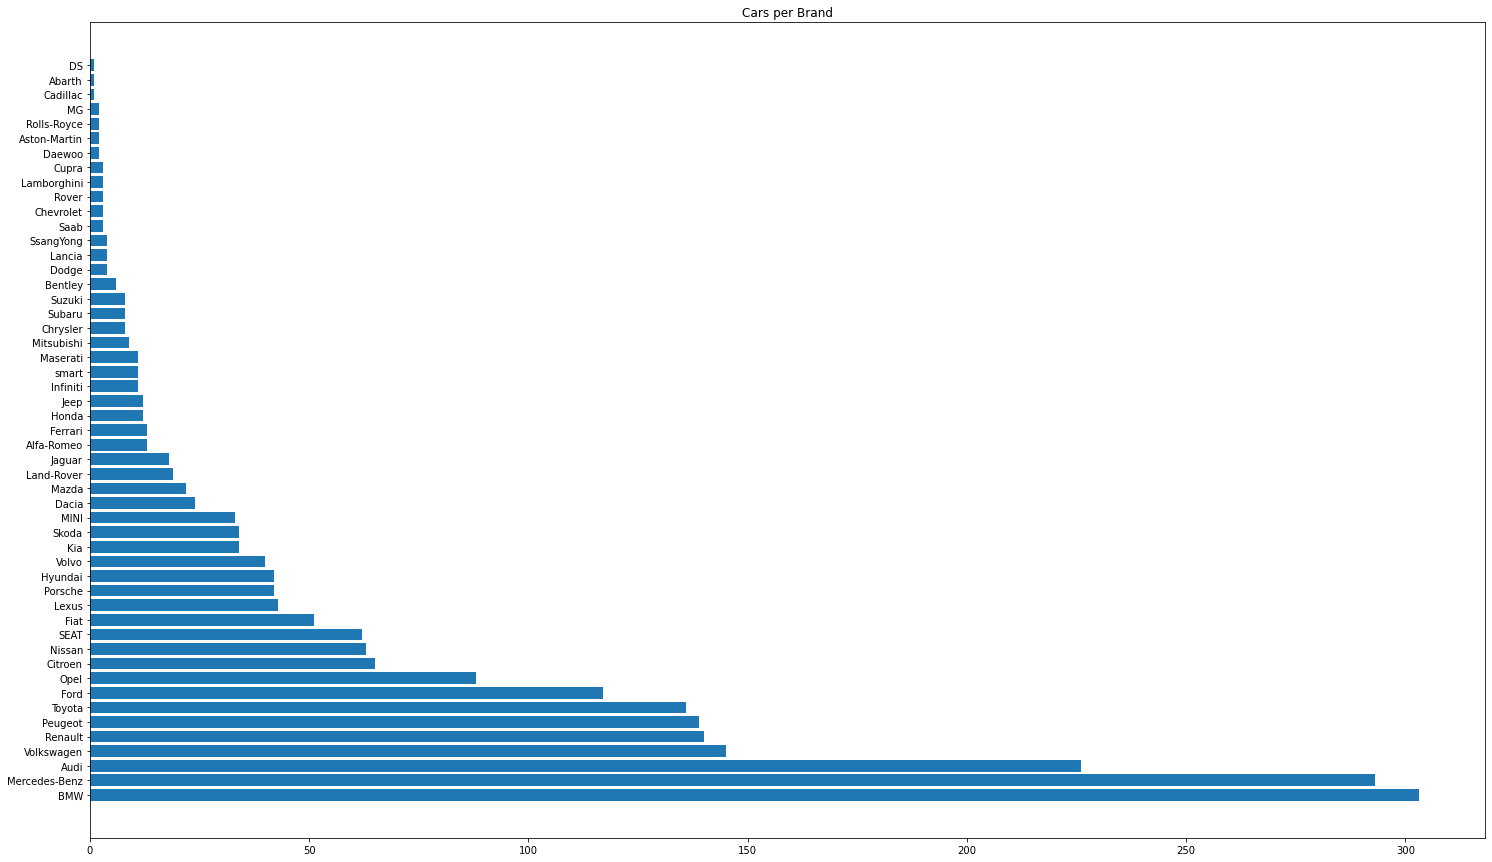

In [4]:
fig, ax = plt.subplots (figsize=(25,15))
plt.barh(df.Brand.value_counts().index, df.Brand.value_counts().values);
plt.title("Cars per Brand")

In [5]:
df_mean_price = df.groupby("Brand")["Price_EUR"].mean().reset_index()

df_mean_price.head()

,Brand,Price_EUR
0,Abarth,16200.000000
1,Alfa-Romeo,15201.076923
2,Aston-Martin,118450.000000
3,Audi,23545.637168
4,BMW,26435.504950


<AxesSubplot:title={'center':'Mean_Price per Brand'}, xlabel='Brand'>

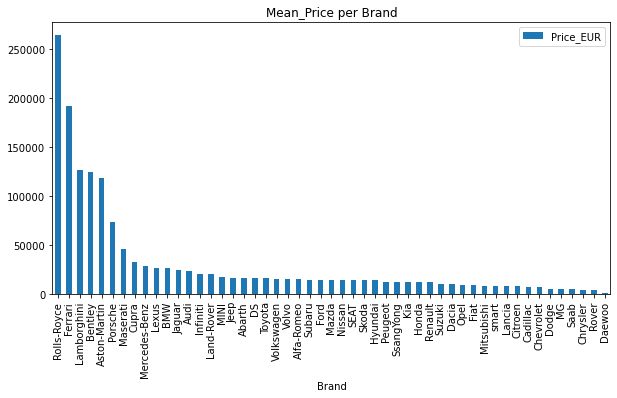

In [6]:
df_mean_price = df_mean_price.sort_values("Price_EUR", ascending = False)

df_mean_price.plot(x = "Brand", y = "Price_EUR", kind = "bar", figsize = (10,5), title = "Mean_Price per Brand")


## Analysing the Year

<AxesSubplot:ylabel='Frequency'>

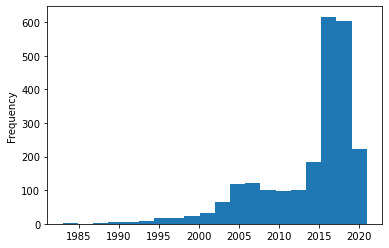

In [7]:
df['Year'].plot(kind='hist', bins=20)

As we can see on the graph above most of the cars on the data frame are from 2015 in advance

## Analysing the Fuel type

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Diesel'),
  Text(1, 0, 'Petrol'),
  Text(2, 0, 'Hybrid'),
  Text(3, 0, 'Electric'),
  Text(4, 0, 'Compressed Natural Gas \\(CNG\\)')])

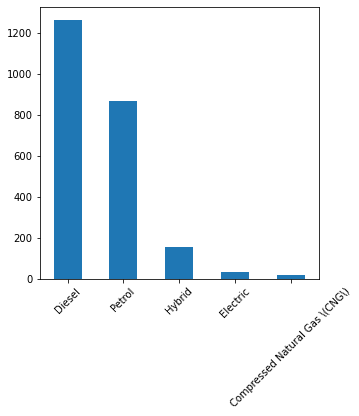

In [8]:
df_Fuel_type = df['Fuel_type'].value_counts()
df_Fuel_type.plot(kind = "bar", figsize = (5,5))
plt.xticks(rotation=45)


More than a half of the cars on this dataframe are powered by Diesel (54%) followed by a Petrol (37%). Electric vehicles represent less than the 10% of the Dataframe, splitted by Hybrids (7%) and Electric (2%). Less than 1% of the cars on this dataframe are porwered by CNG.

## Analysing the Gear type

<AxesSubplot:ylabel='Gear_type'>

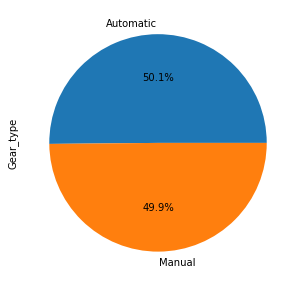

In [9]:
df_Gear_type = df['Gear_type'].value_counts()
df_Gear_type.plot.pie(y='Gear',figsize=(5, 5),autopct='%1.1f%%', startangle=0)

The conclusion obtained from aboves pie is that the cars on this dataset are diveded fifty fifty between Automatic and Manual cars

## Analysing the Province

In [10]:
import geopandas as gpd

In [11]:
df_province = df[["Province", "ZIP"]]

df_province['ZIP'] = df_province['ZIP'].apply(str).apply(lambda x: x.zfill(5))

df_province['ZIP'] = df_province['ZIP'].str.slice(stop = 2)

df_province.sample(5)

/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_1325/1957262456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_province['ZIP'] = df_province['ZIP'].apply(str).apply(lambda x: x.zfill(5))
/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_1325/1957262456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_province['ZIP'] = df_province['ZIP'].str.slice(stop = 2)


,Province,ZIP
108,Madrid,28
1684,Barcelona,08
509,Madrid,28
72,Madrid,28
2222,Almería,04


In [12]:
df_province_grouped = df_province["ZIP"].value_counts().reset_index()
df_province_grouped.head()

,index,ZIP
0,28,870
1,08,321
2,46,171
3,29,116
4,03,100


In [13]:
# Filepaths
ub_shp = "/users/alfon/Desktop/Master/TFM/Files/gadm36_ESP_shp/gadm36_ESP_2.shp"

# Opening the files
spain_shapefile = gpd.read_file(ub_shp, encoding='utf-8')
spain_shapefile.sample(2)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
47,ESP,Spain,ESP.16_1,País Vasco,None,ESP.16.1_1,Álava,Araba,None,Provincia,Province,01,ES.PV.AA,"POLYGON ((-3.13116 42.75807, -3.14786 42.75668..."
44,ESP,Spain,ESP.14_1,Islas Canarias,None,ESP.14.1_1,Las Palmas,None,None,Provincia,Province,35,ES.CN.LP,"MULTIPOLYGON (((-15.36375 27.99291, -15.36375 ..."


In [14]:
spain_shapefile = spain_shapefile.merge(df_province_grouped, left_on=['CC_2'],right_on=['index'], how='left')

In [15]:
plt.rcParams["figure.figsize"]=20,20


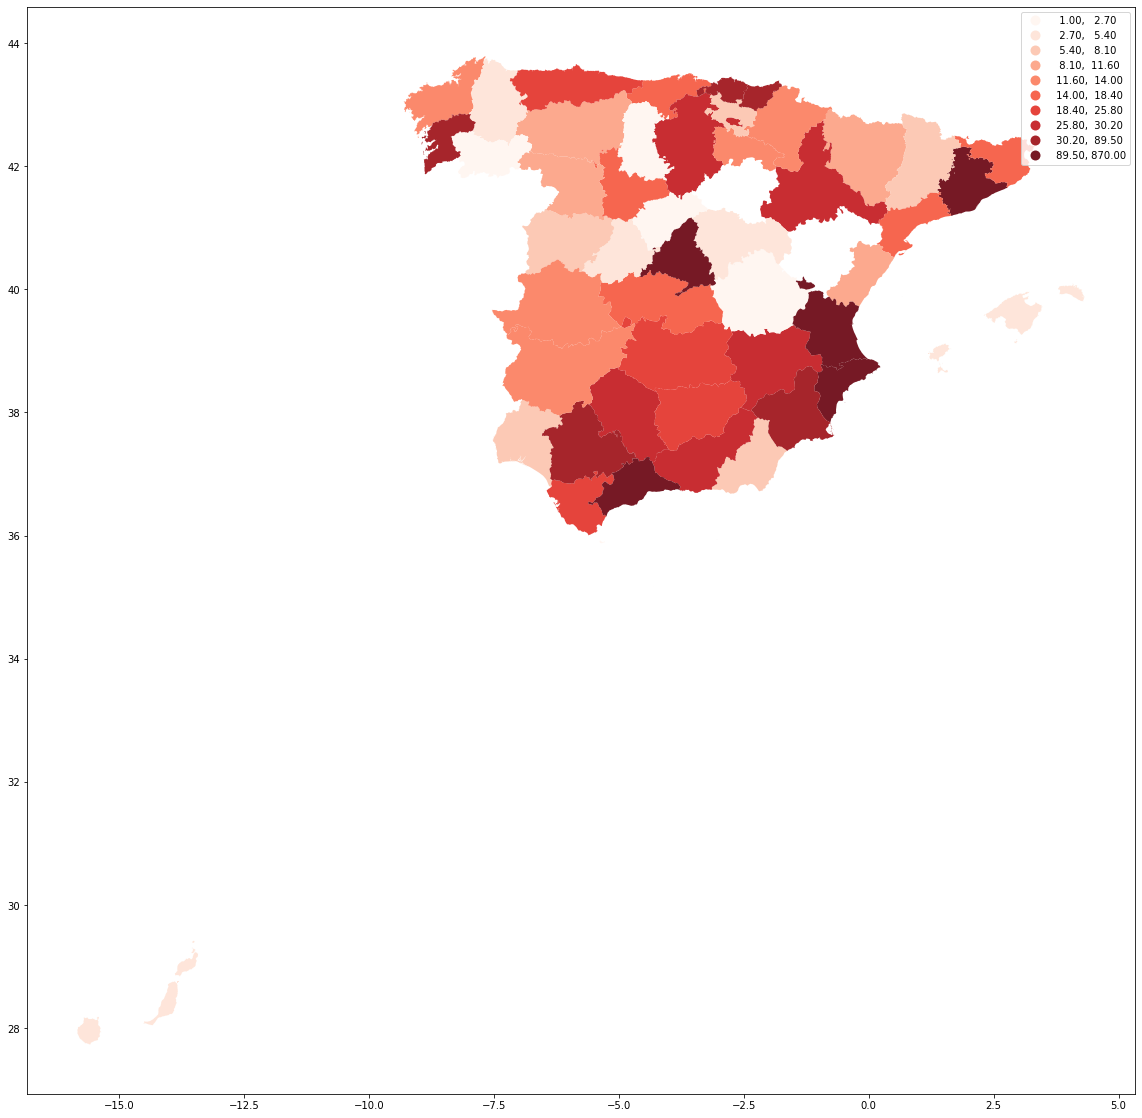

In [16]:
spain_map = spain_shapefile.plot(column="ZIP", scheme = "quantiles" ,linewidth=0.9, cmap="Reds", k=10, alpha=0.9, legend=True) 

## Checking Outliners

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2339.0,2014.067978,6.123277,1983.0,2011.0,2017.0,2018.0,2021.0
Kms,2339.0,101592.817016,73791.375602,1.0,45000.0,92069.0,141123.5,681000.0
Hp,2339.0,171.858914,94.004976,50.0,116.0,150.0,190.0,741.0
Fuel_cons,2339.0,5.742668,2.530652,0.0,4.3,5.1,6.6,21.3
Doors,2339.0,4.475844,0.879718,3.0,3.0,5.0,5.0,5.0
ZIP,2339.0,26112.550235,13183.872567,1003.0,14013.5,28021.0,30006.0,51001.0
Price_EUR,2339.0,21259.430098,27085.133651,500.0,10290.0,15900.0,21825.0,439900.0


### a) Year:

<AxesSubplot:>

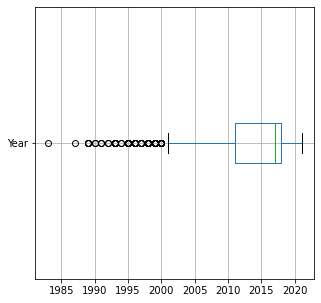

In [18]:
df.boxplot('Year', vert = False, figsize = (5,5))

In [19]:
df[df["Year"] < 2001 ].sample(5)

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,ZIP,Province,Price_EUR
1737,Ferrari,F355,GTS,Coupe,1999,88000,381,Manual,Petrol,19.3,3,50197,Zaragoza,77900
2244,Land-Rover,Defender,110 TDI Techo Duro,Suv,1993,273000,111,Manual,Diesel,10.1,5,31791,Navarra,15900
1337,Honda,Prelude,2.2 VTI VTEC 4WS SSS,Coupe,1998,133869,185,Automatic,Petrol,8.5,3,3189,Alicante,5900
898,Daewoo,Lanos,1.6 16v. SX,Small,2000,185000,106,Manual,Petrol,8.2,5,46940,Valencia,1500
1645,Ferrari,F8 Spider,F F1 Spyder,Convertible,1998,49300,381,Automatic,Petrol,19.3,3,8340,Barcelona,64900


The cars above are all previous to 2001. We can come to the conclusion that there is no problem with outliners for the Year column

### Kms:

<AxesSubplot:>

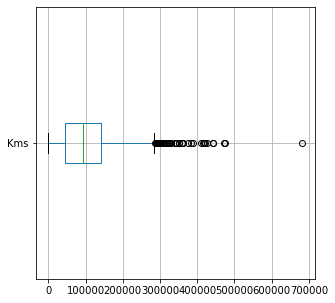

In [20]:
df.boxplot('Kms', vert = False, figsize = (5,5))

In [21]:
df_out_kms = df[df["Kms"] > 300000 ]
df_out_kms.sample(5)

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,ZIP,Province,Price_EUR
1859,BMW,740,740dA,Sedan,2011,341889,306,Automatic,Diesel,6.9,5,39001,Cantabria,18990
895,Ford,Tourneo Connect,Combi FT230 L 1.8 TDdi 75cv 4p #BACA,Van,2010,441430,75,Manual,Diesel,6.0,3,28430,Madrid,2350
721,Audi,Allroad,2.5 TDI quattro Tiptronic,Suv,2003,389000,179,Automatic,Diesel,9.6,5,28891,Madrid,3900
363,Audi,A4,Avant 2.5TDI 163,Wagon,2003,375000,163,Manual,Diesel,6.8,5,28891,Madrid,3500
1126,Ford,Tourneo Custom,2.0TDCI Titanium 170,Minivan,2016,415000,170,Manual,Diesel,6.2,5,29006,Málaga,11999


<AxesSubplot:>

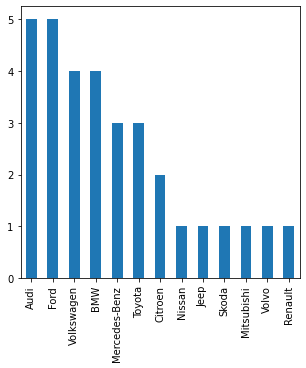

In [22]:
df_out_kms_by_brand = df_out_kms['Brand'].value_counts()
df_out_kms_by_brand.plot(kind = "bar", figsize = (5,5))


From .decribe T function above we can see that the largest milage is 681k Kms and the bar graph just above shows that the cars with an outliner mileage are eather Premium makes or generalistic car makes dedicated to the transport industry so we can conclude there are no outliners for Kms

### Horse Power:

<AxesSubplot:>

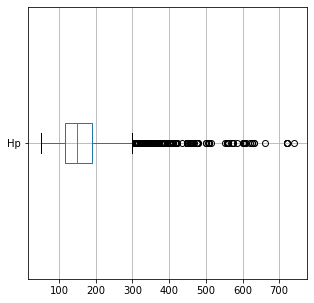

In [23]:
df.boxplot('Hp', vert = False, figsize = (5,5))

In [24]:
df[df["Hp"] > 300 ]

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,ZIP,Province,Price_EUR
18,BMW,840,d xDrive,Coupe,2020,19500,320,Automatic,Diesel,6.2,3,18230,Granada,79990
19,Audi,RS Q8,RS TFSI quattro tiptronic,Coupe,2020,19900,600,Automatic,Petrol,12.1,3,18200,Granada,154900
186,Audi,A8,L 6.0 quattro Tiptronic,Sedan,2004,212000,450,Automatic,Petrol,11.9,5,28660,Madrid,12900
195,Audi,S4,4.2 V8 quattro,Sedan,2004,130500,344,Manual,Petrol,13.3,5,28804,Madrid,13990
210,BMW,525,ActiveHybrid,Sedan,2012,234000,340,Automatic,Hybrid,6.4,5,28970,Madrid,14990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,BMW,X6,xDrive 40dA,Coupe,2017,110137,313,Automatic,Diesel,7.0,3,33392,Asturias,48900
2291,Mercedes-Benz,CLS 500,Aut.,Coupe,2005,99000,306,Automatic,Petrol,11.3,3,37300,Salamanca,9999
2292,Audi,S5,4.2 quattro,Coupe,2008,138000,354,Manual,Petrol,12.1,3,37300,Salamanca,16999
2321,BMW,M2,A,Coupe,2017,75000,370,Automatic,Petrol,7.9,3,47016,Valladolid,42900


Cars with more than 300 Hp are luxury cars. No reason to consider them as outliners

### Fuel consumption:

<AxesSubplot:>

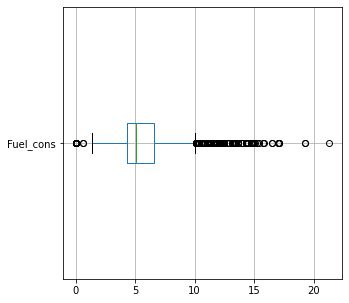

In [25]:
df.boxplot( "Fuel_cons", vert = False , figsize = (5,5))

In [26]:
df[df["Fuel_cons"] == 0]

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,ZIP,Province,Price_EUR
40,Citroen,C-Zero,Airdream Seduction,Small,2017,39343,67,Automatic,Electric,0.0,5,28021,Madrid,7950
42,Citroen,C-Zero,Airdream Seduction,Small,2017,39244,67,Automatic,Electric,0.0,5,28045,Madrid,8050
50,Nissan,Leaf,Acenta 30KWh,Small,2016,40096,109,Automatic,Electric,0.0,5,28021,Madrid,9190
59,Renault,ZOE,Life 40 Flexi 57kW,Small,2017,20264,77,Automatic,Electric,0.0,5,28100,Madrid,10390
66,Renault,ZOE,Limited 40 R110 Flexi 80kW,Small,2019,9480,109,Automatic,Electric,0.0,5,28806,Madrid,11500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,Mercedes-Benz,300,G300GE Capota,Convertible,1989,119918,170,Manual,Petrol,0.0,3,17401,Gerona/Girona,14800
2251,Renault,R 20,2.0 TX ABS A.A.,Sedan,1989,295817,120,Manual,Petrol,0.0,5,33700,Asturias,4000
2254,BMW,i3,94 Ah,Minivan,2017,87406,170,Automatic,Electric,0.0,5,33392,Asturias,17500
2255,Kia,Soul,Eléctrico CHAdeMO,Minivan,2016,126486,110,Automatic,Electric,0.0,5,33429,Asturias,13545


Some of the cars above could have a 0 l / 100 km consume as they are electric vehicles, others have that field missed and we are going to fill it with the the mean of the data set

In [27]:
df[(df["Fuel_cons"] == 0) & (df["Fuel_type"] != "Electric")]

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,ZIP,Province,Price_EUR
142,Volkswagen,Golf,2.0TDI Life 85kW,Small,2020,7475,116,Manual,Diesel,0.0,5,28021,Madrid,20890
633,Porsche,Boxster,S PDK,Coupe,2018,23696,349,Automatic,Petrol,0.0,3,28041,Madrid,73900
636,Mercedes-Benz,GLE 350,GLE350deCoupé 4Matic Aut.,Coupe,2020,8000,320,Automatic,Hybrid,0.0,3,28260,Madrid,82900
716,Rover,200,216 Cabriolet,Convertible,1996,242000,111,Manual,Petrol,0.0,3,28220,Madrid,4950
922,Renault,R 21,2.0 12V GTI,Sedan,1992,116000,136,Manual,Petrol,0.0,5,46006,Valencia,6900
981,Maserati,Biturbo,2500 E,Coupe,1987,95500,200,Manual,Petrol,0.0,3,46970,Valencia,12900
987,BMW,840,840Ci Aut.,Coupe,1993,271000,286,Automatic,Petrol,0.0,3,46980,Valencia,21750
1004,Porsche,Boxster,S PDK,Coupe,2018,23696,349,Automatic,Petrol,0.0,3,46460,Valencia,73900
1024,BMW,325,325i Cabriolet Aut.,Convertible,1991,162000,170,Automatic,Petrol,0.0,3,46006,Valencia,14900
1041,Rover,200,216 Cabriolet,Convertible,1993,153000,111,Manual,Petrol,0.0,3,46006,Valencia,4900


In [28]:
df["Fuel_cons"] = df["Fuel_cons"].replace(0 , np.NaN)\
                                 .fillna(df["Fuel_cons"].mean())

In [29]:
df[df["Fuel_cons"] > 10]

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,ZIP,Province,Price_EUR
19,Audi,RS Q8,RS TFSI quattro tiptronic,Coupe,2020,19900,600,Automatic,Petrol,12.1,3,18200,Granada,154900
158,Renault,Safrane,2.0 Si,Sedan,1999,66000,137,Manual,Petrol,10.1,5,28043,Madrid,4800
162,Jaguar,S-Type,3.0 V6 Executive,Sedan,2005,119000,239,Automatic,Petrol,10.7,5,28891,Madrid,5900
186,Audi,A8,L 6.0 quattro Tiptronic,Sedan,2004,212000,450,Automatic,Petrol,11.9,5,28660,Madrid,12900
195,Audi,S4,4.2 V8 quattro,Sedan,2004,130500,344,Manual,Petrol,13.3,5,28804,Madrid,13990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,Volkswagen,Golf,R32,Small,2003,102000,241,Manual,Petrol,10.8,5,25126,Lérida/Lleida,19000
2291,Mercedes-Benz,CLS 500,Aut.,Coupe,2005,99000,306,Automatic,Petrol,11.3,3,37300,Salamanca,9999
2292,Audi,S5,4.2 quattro,Coupe,2008,138000,354,Manual,Petrol,12.1,3,37300,Salamanca,16999
2299,Volkswagen,Passat CC,3.6 V6 FSI 4Motion DSG,Coupe,2008,127700,299,Automatic,Petrol,10.1,3,22400,Huesca,13990


Cars with a consume above 10 L / 100km are not outliners

### Price:

(0.0, 500000.0)

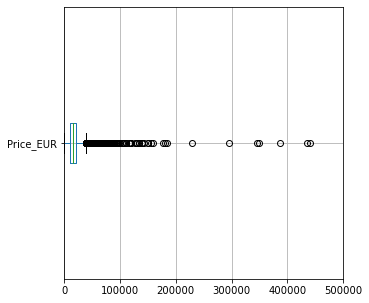

In [30]:
df.boxplot("Price_EUR", vert = False, figsize = (5,5))
plt.xlim(0,500000)

<AxesSubplot:title={'center':'Price_EUR'}, xlabel='Brand'>

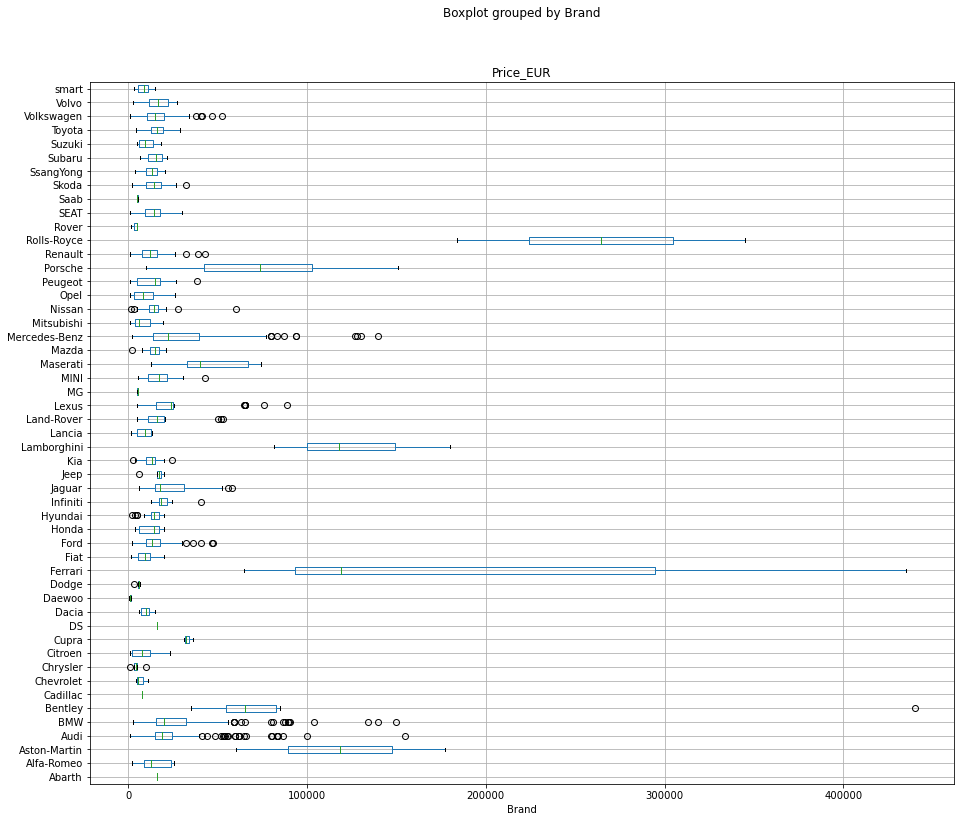

In [31]:
df.boxplot(column = "Price_EUR", by='Brand', vert = False, figsize = (15,13))

In [32]:
df.to_csv('/users/alfon/Desktop/Master/TFM/CSV/cars_final.csv', header=True, index=False)
